# **2025 PIFuHD working notebook (finger cross for you)**


If you are reading this notebook is because you are aware of the original project https://shunsukesaito.github.io/PIFuHD/


From my experience, the original PIFuHD code encounters compatibility issues with the latest versions of libraries. These issues arise due to updates in Python, pre-compiled wheels, or the latest PyTorch versions. To ensure smooth execution, I followed these steps:

* Ensure Python Compatibility:
The first and most crucial step is to use a compatible version of Python. In this notebook, I am using Python 3.9, as the latest versions may introduce breaking changes.

* Override the Default Python Version in Google Colab:
After installing Python 3.9, we need to override the default Python version in the Colab runtime. By doing this, we ensure that the correct version is used throughout the execution of the script.

* Install PIFuHD Dependencies:
Next, we must install all the required dependencies for PIFuHD. The original requirements may not always be compatible with the latest library versions, so it is important to verify each package installation.

* Fix Deprecated Code in the Original Script:
The original codebase contains deprecated functions that are no longer supported in the latest versions of Python and PyTorch. I have updated multiple parts of the code, including modifications to recon.py and other related scripts, to align with current standards.

* Handling the Renderer Block Issue: The final step involves executing the renderer block. However, this particular section did not work for me. The issue seems to stem from Colab not properly recognizing the correct Python version internally at this step. To work around this, I modified the execution approach by running the Python code directly from the interpreter.


-------------

⚠ Note 1 - If this last step fails for you, don’t worry! The final output will still be available inside:

```
pifuhd/results/pifuhd_final/recon
```


⚠ Note 2 - Please ignore this sort of warnings
WARNING:
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /usr/local

⚠ Note 3 - Also, ignore any message from COLAB to reload the Session or runtime in order to take the latest changes. Just ignore the alert and carry on.

⚠ Note 4 - You can find the generated OBJ file there, which can be loaded into Blender or Mixamo for further processing.


⚠ Note 5 - At one point, you will need to manually select the correct path for Python 3.9. Refer to the following image for guidance on how to do this.



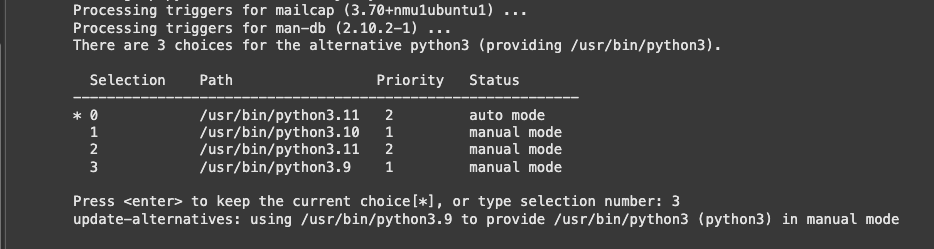


In [ ]:
!sudo apt install python3.9
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 1
!sudo update-alternatives --config python3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9-minimal
Suggested packages:
  python3.9-venv binfmt-support
The following NEW packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9 python3.9-minimal
0 upgraded, 4 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,846 kB of archives.
After this operation, 18.9 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.9-minimal amd64 3.9.21-1+jammy1 [837 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.9-minimal amd64 3.9.21-1+jammy1 [2,075 kB]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.9-stdlib amd64 3.9.21-1+jammy1 [1,841 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu ja

In [ ]:
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py39_24.11.1-0-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local

--2025-02-03 05:44:01--  https://repo.anaconda.com/miniconda/Miniconda3-py39_24.11.1-0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135650334 (129M) [application/octet-stream]
Saving to: ‘mini.sh’

mini.sh             100%[===================>] 129.37M  97.8MB/s    in 1.3s    

2025-02-03 05:44:02 (97.8 MB/s) - ‘mini.sh’ saved [135650334/135650334]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packag

In [ ]:
!python --version

!pip --version

Python 3.9.21
pip 24.2 from /usr/local/lib/python3.9/site-packages/pip (python 3.9)


## Requirements
- Python 3
- PyTorch tested on 1.4.0
- json
- PIL
- skimage
- tqdm
- numpy
- cv2

## Clone PIFuHD repository

In [28]:
!git clone  https://github.com/DanyelMorales/pifuhd_CORE pifuhd

fatal: destination path 'pifuhd' already exists and is not an empty directory.


In [ ]:
!pip install -r /content/pifuhd/requirements.txt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 135.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 128.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 69.0 MB/s eta

## Configure input data

In [ ]:
cd /content/pifuhd/sample_images

/content/pifuhd/sample_images


**If you want to upload your own picture, run the next cell**. Otherwise, go to the next next cell. Currently PNG, JPEG files are supported.

In [ ]:
from google.colab import files

filename = list(files.upload().keys())[0]

Saving doseheroic_basic_male_office_worker_wearing_loose_ironed_office_032e848b-94a9-4dfe-858b-8081a66449f8.png to doseheroic_basic_male_office_worker_wearing_loose_ironed_office_032e848b-94a9-4dfe-858b-8081a66449f8.png


In [ ]:
import os
try:
  image_path = '/content/pifuhd/sample_images/%s' % filename
except:
  image_path = '/content/pifuhd/sample_images/test.png' # example image
image_dir = os.path.dirname(image_path)
file_name = os.path.splitext(os.path.basename(image_path))[0]

# output pathes
obj_path = '/content/pifuhd/results/pifuhd_final/recon/result_%s_256.obj' % file_name
out_img_path = '/content/pifuhd/results/pifuhd_final/recon/result_%s_256.png' % file_name
video_path = '/content/pifuhd/results/pifuhd_final/recon/result_%s_256.mp4' % file_name
video_display_path = '/content/pifuhd/results/pifuhd_final/result_%s_256_display.mp4' % file_name

In [ ]:
cd /content

/content


## Preprocess (for cropping image)

In [ ]:
!git clone https://github.com/Daniil-Osokin/lightweight-human-pose-estimation.pytorch.git

Cloning into 'lightweight-human-pose-estimation.pytorch'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 124 (delta 21), reused 19 (delta 18), pack-reused 90 (from 1)
Receiving objects: 100% (124/124), 230.77 KiB | 1.22 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [ ]:
cd /content/lightweight-human-pose-estimation.pytorch/

/content/lightweight-human-pose-estimation.pytorch


In [ ]:
!wget https://download.01.org/opencv/openvino_training_extensions/models/human_pose_estimation/checkpoint_iter_370000.pth

--2025-02-03 05:47:27--  https://download.01.org/opencv/openvino_training_extensions/models/human_pose_estimation/checkpoint_iter_370000.pth
Resolving download.01.org (download.01.org)... 23.42.200.215, 2600:1406:bc00:f86::a87, 2600:1406:bc00:f8a::a87
Connecting to download.01.org (download.01.org)|23.42.200.215|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87959810 (84M) [application/octet-stream]
Saving to: ‘checkpoint_iter_370000.pth’

checkpoint_iter_370 100%[===================>]  83.88M  88.8MB/s    in 0.9s    

2025-02-03 05:47:29 (88.8 MB/s) - ‘checkpoint_iter_370000.pth’ saved [87959810/87959810]



In [ ]:
import torch
import cv2
import numpy as np
from models.with_mobilenet import PoseEstimationWithMobileNet
from modules.keypoints import extract_keypoints, group_keypoints
from modules.load_state import load_state
from modules.pose import Pose, track_poses
import demo

def get_rect(net, images, height_size):
    net = net.eval()

    stride = 8
    upsample_ratio = 4
    num_keypoints = Pose.num_kpts
    previous_poses = []
    delay = 33
    for image in images:
        rect_path = image.replace('.%s' % (image.split('.')[-1]), '_rect.txt')
        img = cv2.imread(image, cv2.IMREAD_COLOR)
        orig_img = img.copy()
        orig_img = img.copy()
        heatmaps, pafs, scale, pad = demo.infer_fast(net, img, height_size, stride, upsample_ratio, cpu=False)

        total_keypoints_num = 0
        all_keypoints_by_type = []
        for kpt_idx in range(num_keypoints):  # 19th for bg
            total_keypoints_num += extract_keypoints(heatmaps[:, :, kpt_idx], all_keypoints_by_type, total_keypoints_num)

        pose_entries, all_keypoints = group_keypoints(all_keypoints_by_type, pafs)
        for kpt_id in range(all_keypoints.shape[0]):
            all_keypoints[kpt_id, 0] = (all_keypoints[kpt_id, 0] * stride / upsample_ratio - pad[1]) / scale
            all_keypoints[kpt_id, 1] = (all_keypoints[kpt_id, 1] * stride / upsample_ratio - pad[0]) / scale
        current_poses = []

        rects = []
        for n in range(len(pose_entries)):
            if len(pose_entries[n]) == 0:
                continue
            pose_keypoints = np.ones((num_keypoints, 2), dtype=np.int32) * -1
            valid_keypoints = []
            for kpt_id in range(num_keypoints):
                if pose_entries[n][kpt_id] != -1.0:  # keypoint was found
                    pose_keypoints[kpt_id, 0] = int(all_keypoints[int(pose_entries[n][kpt_id]), 0])
                    pose_keypoints[kpt_id, 1] = int(all_keypoints[int(pose_entries[n][kpt_id]), 1])
                    valid_keypoints.append([pose_keypoints[kpt_id, 0], pose_keypoints[kpt_id, 1]])
            valid_keypoints = np.array(valid_keypoints)

            if pose_entries[n][10] != -1.0 or pose_entries[n][13] != -1.0:
              pmin = valid_keypoints.min(0)
              pmax = valid_keypoints.max(0)

              center = (0.5 * (pmax[:2] + pmin[:2])).astype(np.int64)
              radius = int(0.65 * max(pmax[0]-pmin[0], pmax[1]-pmin[1]))
            elif pose_entries[n][10] == -1.0 and pose_entries[n][13] == -1.0 and pose_entries[n][8] != -1.0 and pose_entries[n][11] != -1.0:
              # if leg is missing, use pelvis to get cropping
              center = (0.5 * (pose_keypoints[8] + pose_keypoints[11])).astype(np.int64)
              radius = int(1.45*np.sqrt(((center[None,:] - valid_keypoints)**2).sum(1)).max(0))
              center[1] += int(0.05*radius)
            else:
              center = np.array([img.shape[1]//2,img.shape[0]//2])
              radius = max(img.shape[1]//2,img.shape[0]//2)

            x1 = center[0] - radius
            y1 = center[1] - radius

            rects.append([x1, y1, 2*radius, 2*radius])

        np.savetxt(rect_path, np.array(rects), fmt='%d')

In [ ]:
net = PoseEstimationWithMobileNet()
checkpoint = torch.load('checkpoint_iter_370000.pth', map_location='cpu')
load_state(net, checkpoint)

get_rect(net.cuda(), [image_path], 512)

<ipython-input-14-736a0682666b>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('checkpoint_iter_370000.pth', map_location='cpu')


## Download the Pretrained Model

In [ ]:
cd /content/pifuhd/

/content/pifuhd


In [ ]:
!sh ./scripts/download_trained_model.sh

+ mkdir -p checkpoints
+ cd checkpoints
+ wget https://dl.fbaipublicfiles.com/pifuhd/checkpoints/pifuhd.pt pifuhd.pt
--2025-02-03 05:47:35--  https://dl.fbaipublicfiles.com/pifuhd/checkpoints/pifuhd.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.15, 13.226.210.78, 13.226.210.111, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1548375177 (1.4G) [application/octet-stream]
Saving to: ‘pifuhd.pt’

pifuhd.pt           100%[===================>]   1.44G   187MB/s    in 12s     

2025-02-03 05:47:47 (125 MB/s) - ‘pifuhd.pt’ saved [1548375177/1548375177]

--2025-02-03 05:47:47--  http://pifuhd.pt/
Resolving pifuhd.pt (pifuhd.pt)... failed: Name or service not known.
wget: unable to resolve host address ‘pifuhd.pt’
FINISHED --2025-02-03 05:47:47--
Total wall clock time: 12s
Downloaded: 1 files, 1.4G in 12s (125 MB/s)


## Run PIFuHD!


In [ ]:
!pip install matplotlib # just if needed run this line
# Warning: all images with the corresponding rectangle files under -i will be processed.
!python -m apps.simple_test -r 256 --use_rect -i $image_dir

# seems that 256 is the maximum resolution that can fit into Google Colab.
# If you want to reconstruct a higher-resolution mesh, please try with your own machine.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.5 MB/s eta 0:00:00


Resuming from  ./checkpoints/pifuhd.pt
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/content/pifuhd/apps/simple_test.py", line 30, in <module>
    reconWrapper(cmd, args.use_rect)
  File "/content/pifuhd/apps/recon.py", line 220, in reconWrapper
    recon(opt, use_rect)
  File "/content/pifuhd/apps/recon.py", line 150, in recon
    state_dict = torch.load(state_dict_path, map_location=cuda)    
  File "/usr/local/lib/python3.9/site-packages/torch/serialization.py", line 1494, in load
    raise pickle.UnpicklingError(_get_wo_message(str(e))) from None
_pickle.UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value 

## Render the result

In [ ]:
import sys
import torch
!pip install fvcore iopath
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py39_cu116_pyt1131/download.html

Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py39_cu116_pyt1131/download.html


The following code might throw error, ignore it.

In [ ]:
!python -c "import sys, os; sys.path.append(os.path.abspath('/content/pifuhd/lib/')); from colab_util import generate_video_from_obj, set_renderer, video; renderer = set_renderer(); obj_path = 'input.obj'; out_img_path = 'output.png'; video_path = 'output.mp4'; video_display_path = 'output_display.mp4'; generate_video_from_obj(obj_path, out_img_path, video_path, renderer); os.system(f'ffmpeg -i {video_path} -vcodec libx264 {video_display_path} -y -loglevel quiet'); video(video_display_path)"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/content/pifuhd/lib/colab_util.py", line 32, in <module>
    from IPython.display import HTML
ModuleNotFoundError: No module named 'IPython'
